In [ ]:
!git add portfolio.ipynb

In [ ]:
!git commit -m "Add portfolio notebook"


In [ ]:
print("Cartogis portfolio of Lauri Levomäki")

TESTI TESTI TESTI

In [ ]:
print("KOKEILUA")

In [1]:
!pip install geopandas
!pip install osmnx
!pip install contextily
 

# install libraries

!pip install folium 
!pip install branca

## The story telling part start here:
!pip install rasterio 

!pip install mapclassify

!pip install pysal
!pip install IPython



In [ ]:
## Vaestoetiheys grid-kartta


import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# muista: https://hri.fi/data/fi/dataset/vaestotietoruudukko

# Step 1: Load Data
helsinki_grid = gpd.read_file('data/vaestotieto/Vaestotietoruudukko_2022.shp')

helsinki_grid = helsinki_grid.to_crs(epsg=3879)  # Change the projection to Web Mercator (EPSG:3857)

# Define population density bins
density_bins = [0, 500, 1000, 1500, 2000, 2500]  # Define your own population density bins here

# Define population density bin labels
density_labels = ['< 500', '500 - 1000', '1000 - 1500', '1500 - 2000', '2000 - 2500']

# Assign each cell to a population density bin
helsinki_grid['density_bin'] = pd.cut(helsinki_grid['ASUKKAITA'], bins=density_bins, labels=density_labels)

# Extract the boundaries of each grid cell
cell_boundaries = helsinki_grid.boundary

# Plot the thematic map with different colors for each population density bin and narrower cell boundaries
fig, ax = plt.subplots(figsize=(12, 6))

cell_boundaries.plot(ax=ax, color='black', linewidth=0.1)  # Plot cell boundaries with narrower lines and white color
helsinki_grid.plot(column='density_bin', ax=ax, legend=True, cmap='Blues', linewidth=0.1,
                   legend_kwds={'title': 'Population/\n250x250m', 'loc': 'upper right', 'bbox_to_anchor': (0.92, 0.3)})
ax.axis('off')  # Turn off the axis
plt.title('POPULATION DENSITY IN HELSINKI REGION 2022', fontsize=15, fontweight='bold', color='blue', pad=30)  # Use Arial font and set title color to white

# Add the data source text in the bottom left corner with blue color
plt.text(0.03, 0.06, 'Source: Helsinki Region Infoshare', transform=ax.transAxes, fontsize=9, color='blue')

# Save the plot as a PNG file
plt.savefig('population_density_helsinki.png', bbox_inches='tight')

plt.show()


In [ ]:
# Where older people feel happy in Helsinki

import geopandas as gpd
import pathlib
import osmnx
import contextily
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Path to our Experience data from Helsinki
NOTEBOOK_PATH = pathlib.Path().resolve()

# We will export the final map here,
# let’s also prepare an output directory for it:
DATA_DIRECTORY = NOTEBOOK_PATH / 'data'
MAP_DIRECTORY = NOTEBOOK_PATH / "MyMap_happypoints"
MAP_DIRECTORY.mkdir(exist_ok=True)
file_path = DATA_DIRECTORY / 'happypoints/happy_points.shp'

# Read the data as a GeoDataFrame named exp_places
exp_places = gpd.read_file(file_path)
print(exp_places.head(1))
print(f"Number of rows in our dataset: {len(exp_places)}")

# Print the first row of the dataset to see a sample of the data
print(exp_places.head(1))

# Print the column names
print("Columns in the dataset:", exp_places.columns)

# Print a summary of the GeoDataFrame to get more details about the data
print(exp_places.info())

PLACE_NAME = "Helsinki, Finland"
helsinki_area = osmnx.geocode_to_gdf(PLACE_NAME)

# Get the polygon to the same CRS as original data
helsinki_area = helsinki_area.to_crs(exp_places.crs)

# Ensure CRS match
assert exp_places.crs == helsinki_area.crs, "CRS do not match"

# Spatial join to extract points within the polygon
points_in_helsinki = gpd.sjoin(exp_places, helsinki_area, how="inner", predicate='within')

# Adding a basemap
points_to_vis = points_in_helsinki.to_crs("EPSG:3857")

# Create the figure and axis objects
fig, ax = plt.subplots()

# Fill the outer area with a neutral color
fig.patch.set_facecolor('#ADD8E6')

# Plotting with a larger marker size and contrasting color
points_to_vis.plot(ax=ax, markersize=8, color='blue', legend=True, alpha=0.6, edgecolor='black')

# Adding the OpenStreetMap Carto basemap
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron)

# Add main title
main_title_text = 'Where 55-75 Year Olds Feel Happy in Helsinki'
ax.set_title(main_title_text, fontsize=15, weight='bold')

# Add data source attribution
attribution_text = "Data source: SoftGIS Group (Aalto University)"
ax.text(0.99, 0.002, attribution_text, transform=ax.transAxes, fontsize=7,
        verticalalignment='bottom', horizontalalignment='right', color='black', alpha=0.7)

# Add second title styled similarly to the main title
second_title_text = "Data collected in 2015"
ax.text(0.5, -0.05, second_title_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='center', color='black', alpha=0.7, fontweight='bold')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Set this to off if you want to remove the frame
ax.axis('on')

# Add a black frame
rect = Rectangle((0, 0), 1, 1, transform=ax.transAxes, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Adjust figure size and modify only left and right margins
fig.set_size_inches(12, 6)  # Increase width only
fig.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)  # Keep top and bottom as they were

# Save the map
map_file_path = MAP_DIRECTORY / 'happy_places_map.png'
fig.savefig(map_file_path, bbox_inches='tight', pad_inches=0.1)
print(f"Map saved to: {map_file_path}")

In [ ]:
# Let´s check the data

# Define the path to the directory containing the shapefile
shapefile_dir = 'ilmanlaatu_shape/'

# Choose the year to visualize
year = 2023
filename = f'typpidioksidin_vuosikeskiarvot_{year}.shp'
filepath = os.path.join(shapefile_dir, filename)

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(filepath)

# Ensure GeoDataFrame is in WGS84 (EPSG:4326)
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs(epsg=4326)

# Plot the GeoDataFrame
gdf.plot(figsize=(10, 10))
plt.title('Air Quality Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


   NO2  Vuosi          Tyyppi                        Sijainti        Osoite  \
0   39   2015  passiivikeräin  Helsinki, Hämeentien ympäristö  Hämeentie 7B   

                 Ympäristö Lisätiedot Tuulettuvu  Lähiliiken  Muu_liiken  \
0  vilkasliikenteinen alue       None  katukuilu       10800           0   

                                              Linkki  \
0  https://www.hsy.fi/fi/asiantuntijalle/ilmansuo...   

                           geometry  
0  POINT (25497519.000 6674317.000)  
Columns in the dataset: Index(['NO2', 'Vuosi', 'Tyyppi', 'Sijainti', 'Osoite', 'Ympäristö',
       'Lisätiedot', 'Tuulettuvu', 'Lähiliiken', 'Muu_liiken', 'Linkki',
       'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NO2         77 non-null     int64   
 1   Vuosi       77 non-null     int64   
 2   Tyyppi  

C:\Users\lauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


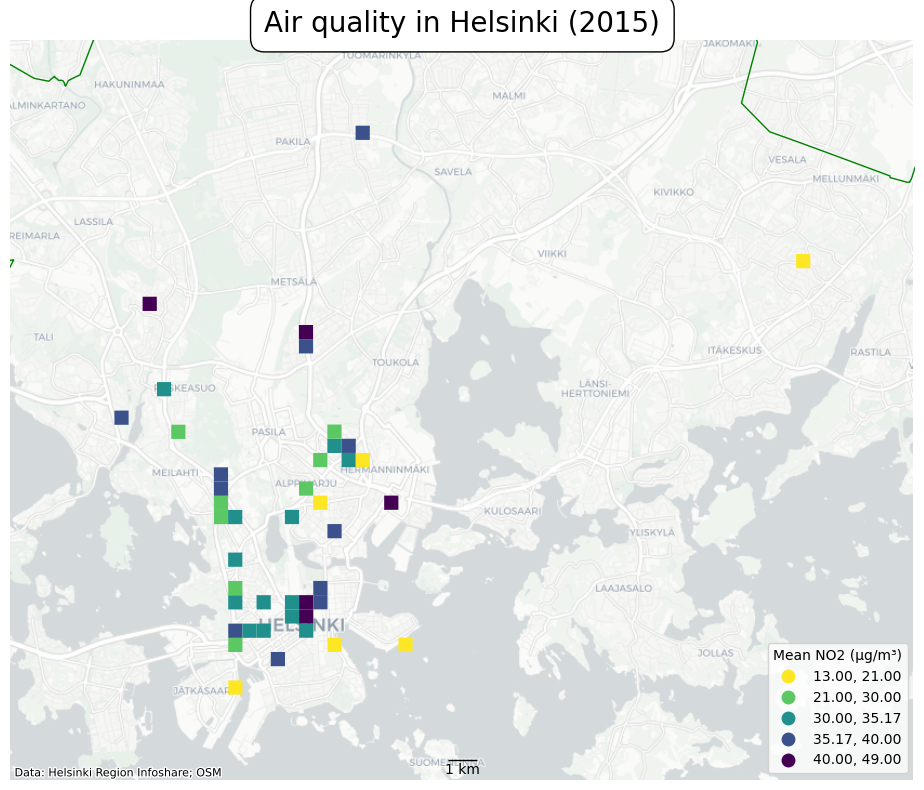

In [3]:
#3 GRID MAP 2015
## TAMA TOIMII
## MUUTA TIEDOT (otsikot jne, source)
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import contextily 
import osmnx as ox
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mapclassify import UserDefined

# Load air quality data into a GeoDataFrame
shapefile_dir = 'ilmanlaatu_shape/'
filename = 'typpidioksidin_vuosikeskiarvot_2015.shp'
filepath = os.path.join(shapefile_dir, filename)
air_quality_gdf = gpd.read_file(filepath)

# Filter data for the year 2023
air_quality_gdf = air_quality_gdf[air_quality_gdf['Vuosi'] == 2015]

# Print the first row of the dataset to see a sample of the data
print(air_quality_gdf.head(1))

# Print the column names
print("Columns in the dataset:", air_quality_gdf.columns)

# Print a summary of the GeoDataFrame to get more details about the data
print(air_quality_gdf.info())

# Geocode Helsinki boundaries using OSMnx
PLACE_NAME = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(PLACE_NAME)

# Check and print CRS of both datasets
print("Air quality data CRS:", air_quality_gdf.crs)
print("Helsinki area CRS:", helsinki_area.crs)

# Reproject Helsinki area to match the CRS of the air quality data
helsinki_area = helsinki_area.to_crs(air_quality_gdf.crs)

# Ensure CRS match
assert air_quality_gdf.crs == helsinki_area.crs, "CRS do not match"

# Clip air quality data to Helsinki area
air_quality_gdf = gpd.clip(air_quality_gdf, helsinki_area)

# Determine the bounds of the air quality data
minx, miny, maxx, maxy = air_quality_gdf.total_bounds

# Grid dimensions (in meters)
grid_height = 250
grid_width = 250

# Generate the x and y coordinates for the grid
x_coords = np.arange(minx, maxx + grid_width, grid_width)
y_coords = np.arange(miny, maxy + grid_height, grid_height)

# Initialize a list to hold the grid polygons
grid_polygons = []

for x in x_coords:
    for y in y_coords:
        # Define the polygon for each cell
        polygon = Polygon([(x, y), (x+grid_width, y), (x+grid_width, y+grid_height), (x, y+grid_height)])
        grid_polygons.append(polygon)

# Create a GeoDataFrame from the grid polygons
grid_gdf = gpd.GeoDataFrame({'geometry': grid_polygons}, crs=air_quality_gdf.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(grid_gdf, air_quality_gdf, how="inner", predicate="intersects")

# Aggregate NO2 values by grid cell
mean_no2_df = joined_gdf.groupby(joined_gdf.index)['NO2'].mean()

# Join the aggregated NO2 values back to the grid GeoDataFrame
grid_with_no2 = grid_gdf.join(mean_no2_df, how='inner')

# Reproject grid_with_no2 to EPSG:3857 for basemap compatibility
grid_with_no2 = grid_with_no2.to_crs(epsg=3857)

# Reproject helsinki_area to EPSG:3857 for basemap compatibility
helsinki_area = helsinki_area.to_crs(epsg=3857)

#Plot the grid with NO2 values

#Visualize
ax = grid_with_no2.plot(
    figsize=(12, 8),

    column="NO2",
    scheme="NaturalBreaks",
    cmap="viridis_r",
    linewidth=1,
    alpha=1.0,

    legend=True,
    legend_kwds={"title": "Mean NO2 (µg/m³)", "loc": "lower right"}
)


# Remove axis
ax.set_axis_off()
plt.title('Air quality in Helsinki (2015)', 
    fontdict={'fontsize': '20', 'fontweight': '7'},
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
         )

# basemap
contextily.add_basemap(
    ax,
    source=contextily.providers.CartoDB.Positron, alpha=1.0,  # Increased alpha value for basemap visibility
    attribution=("Data: Helsinki Region Infoshare; OSM")
)

# Add a scale bar with AnchoredSizeBar
fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
                           1000,  # Length of the bar in data units
                           '1 km',  # Label for the scale bar
                           'lower center',  # Location of the scale bar
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# Add Helsinki boundaries with green edges
helsinki_area.boundary.plot(ax=ax, edgecolor="green", linewidth=1)

# Calculate the extent and center of the grid_with_no2 data
minx, miny, maxx, maxy = grid_with_no2.total_bounds
x_center = (minx + maxx) / 2
y_center = (miny + maxy) / 2
x_extent = maxx - minx
y_extent = maxy - miny
margin = 0.1  # Adjust this value to add margin around the map

# Set the axis limits to ensure the map is centered and zoom out a bit
zoom_out_factor = 1.3  # Adjust this factor to zoom out more or less
ax.set_xlim(x_center - (x_extent / 2) * zoom_out_factor, x_center + (x_extent / 2) * zoom_out_factor)
ax.set_ylim(y_center - (y_extent / 2) * zoom_out_factor, y_center + (y_extent / 2) * zoom_out_factor)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('gridmap_no2_2015.png', bbox_inches='tight')
# Show plot
plt.show()

   NO2  Vuosi               Tyyppi          Sijainti            Osoite  \
0   10   2020  pysyvä mittausasema  Helsinki, Kallio  Helsinginkatu 23   

       Ympäristö            Lisätiedot Tuulettuvu  Lähiliiken  Muu_liiken  \
0  kantakaupunki  kaupunkitausta-asema      avoin         NaN         NaN   

   ETRS_GK25X  ETRS_GK25Y                          geometry  
0    25497259     6674951  POINT (25497259.000 6674951.000)  
Columns in the dataset: Index(['NO2', 'Vuosi', 'Tyyppi', 'Sijainti', 'Osoite', 'Ympäristö',
       'Lisätiedot', 'Tuulettuvu', 'Lähiliiken', 'Muu_liiken', 'ETRS_GK25X',
       'ETRS_GK25Y', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NO2         56 non-null     int64   
 1   Vuosi       56 non-null     int64   
 2   Tyyppi      56 non-null     object  
 3   Sijainti    56 non-nu

C:\Users\lauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


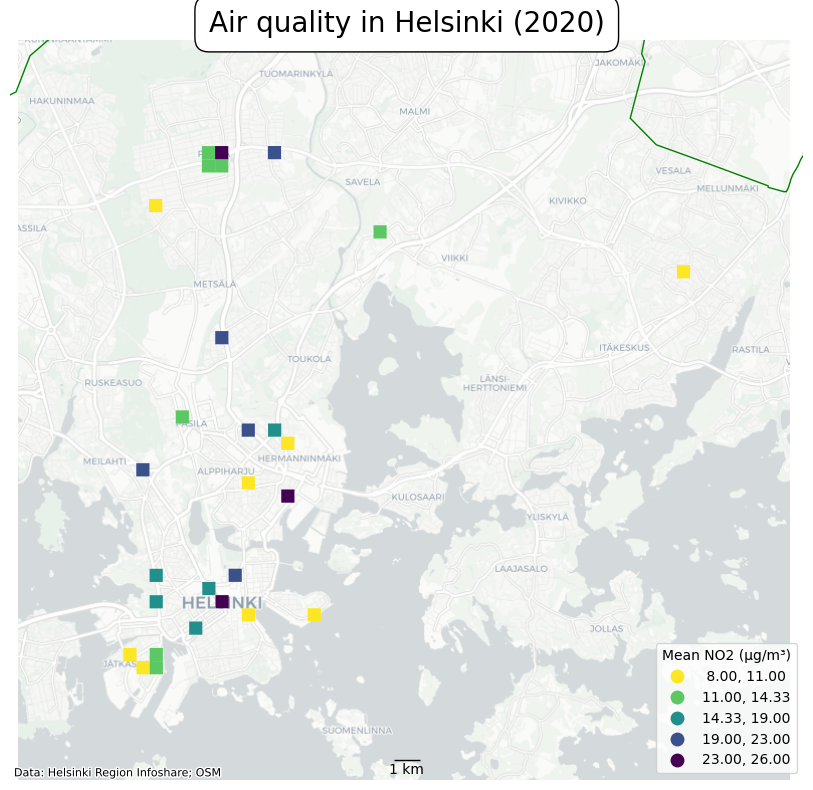

In [7]:
#3 GRID MAP 2020
## TAMA TOIMII
## MUUTA TIEDOT (otsikot jne, source)
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import contextily 
import osmnx as ox
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mapclassify import UserDefined

# Load air quality data into a GeoDataFrame
shapefile_dir = 'ilmanlaatu_shape/'
filename = 'typpidioksidin_vuosikeskiarvot_2020.shp'
filepath = os.path.join(shapefile_dir, filename)
air_quality_gdf = gpd.read_file(filepath)

# Filter data for the year 2023
air_quality_gdf = air_quality_gdf[air_quality_gdf['Vuosi'] == 2020]

# Print the first row of the dataset to see a sample of the data
print(air_quality_gdf.head(1))

# Print the column names
print("Columns in the dataset:", air_quality_gdf.columns)

# Print a summary of the GeoDataFrame to get more details about the data
print(air_quality_gdf.info())

# Geocode Helsinki boundaries using OSMnx
PLACE_NAME = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(PLACE_NAME)

# Check and print CRS of both datasets
print("Air quality data CRS:", air_quality_gdf.crs)
print("Helsinki area CRS:", helsinki_area.crs)

# Reproject Helsinki area to match the CRS of the air quality data
helsinki_area = helsinki_area.to_crs(air_quality_gdf.crs)

# Ensure CRS match
assert air_quality_gdf.crs == helsinki_area.crs, "CRS do not match"

# Clip air quality data to Helsinki area
air_quality_gdf = gpd.clip(air_quality_gdf, helsinki_area)

# Determine the bounds of the air quality data
minx, miny, maxx, maxy = air_quality_gdf.total_bounds

# Grid dimensions (in meters)
grid_height = 250
grid_width = 250

# Generate the x and y coordinates for the grid
x_coords = np.arange(minx, maxx + grid_width, grid_width)
y_coords = np.arange(miny, maxy + grid_height, grid_height)

# Initialize a list to hold the grid polygons
grid_polygons = []

for x in x_coords:
    for y in y_coords:
        # Define the polygon for each cell
        polygon = Polygon([(x, y), (x+grid_width, y), (x+grid_width, y+grid_height), (x, y+grid_height)])
        grid_polygons.append(polygon)

# Create a GeoDataFrame from the grid polygons
grid_gdf = gpd.GeoDataFrame({'geometry': grid_polygons}, crs=air_quality_gdf.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(grid_gdf, air_quality_gdf, how="inner", predicate="intersects")

# Aggregate NO2 values by grid cell
mean_no2_df = joined_gdf.groupby(joined_gdf.index)['NO2'].mean()

# Join the aggregated NO2 values back to the grid GeoDataFrame
grid_with_no2 = grid_gdf.join(mean_no2_df, how='inner')

# Reproject grid_with_no2 to EPSG:3857 for basemap compatibility
grid_with_no2 = grid_with_no2.to_crs(epsg=3857)

# Reproject helsinki_area to EPSG:3857 for basemap compatibility
helsinki_area = helsinki_area.to_crs(epsg=3857)

#Plot the grid with NO2 values

#Visualize
ax = grid_with_no2.plot(
    figsize=(12, 8),

    column="NO2",
    scheme="NaturalBreaks",
    cmap="viridis_r",
    linewidth=1,
    alpha=1.0,

    legend=True,
    legend_kwds={"title": "Mean NO2 (µg/m³)", "loc": "lower right"}
)


# Remove axis
ax.set_axis_off()
plt.title('Air quality in Helsinki (2020)', 
    fontdict={'fontsize': '20', 'fontweight': '7'},
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
         )

# basemap
contextily.add_basemap(
    ax,
    source=contextily.providers.CartoDB.Positron, alpha=1.0,  # Increased alpha value for basemap visibility
    attribution=("Data: Helsinki Region Infoshare; OSM")
)

# Add a scale bar with AnchoredSizeBar
fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
                           1000,  # Length of the bar in data units
                           '1 km',  # Label for the scale bar
                           'lower center',  # Location of the scale bar
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# Add Helsinki boundaries with green edges
helsinki_area.boundary.plot(ax=ax, edgecolor="green", linewidth=1)

# Calculate the extent and center of the grid_with_no2 data
minx, miny, maxx, maxy = grid_with_no2.total_bounds
x_center = (minx + maxx) / 2
y_center = (miny + maxy) / 2
x_extent = maxx - minx
y_extent = maxy - miny
margin = 0.1  # Adjust this value to add margin around the map

# Set the axis limits to ensure the map is centered and zoom out a bit
zoom_out_factor = 1.4  # Adjust this factor to zoom out more or less
ax.set_xlim(x_center - (x_extent / 2) * zoom_out_factor, x_center + (x_extent / 2) * zoom_out_factor)
ax.set_ylim(y_center - (y_extent / 2) * zoom_out_factor, y_center + (y_extent / 2) * zoom_out_factor)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('gridmap_no2_2020.png', bbox_inches='tight')

# Show plot
plt.show()


   NO2  Vuosi               Tyyppi          Sijainti            Osoite  \
0   11   2023  pysyvä mittausasema  Helsinki, Kallio  Helsinginkatu 25   

       Ympäristo             Lisätiedo Tuulettuvu  Lähiliike Muu_liiken  \
0  kantakaupunki  kaupunkitausta-asema      avoin        NaN       None   

       x_GK25     y_GK25                          geometry  
0  25497260.0  6674948.0  POINT (25497260.000 6674948.000)  
Columns in the dataset: Index(['NO2', 'Vuosi', 'Tyyppi', 'Sijainti', 'Osoite', 'Ympäristo',
       'Lisätiedo', 'Tuulettuvu', 'Lähiliike', 'Muu_liiken', 'x_GK25',
       'y_GK25', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NO2         49 non-null     int64   
 1   Vuosi       49 non-null     int64   
 2   Tyyppi      49 non-null     object  
 3   Sijainti    49 non-null     object  


C:\Users\lauri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


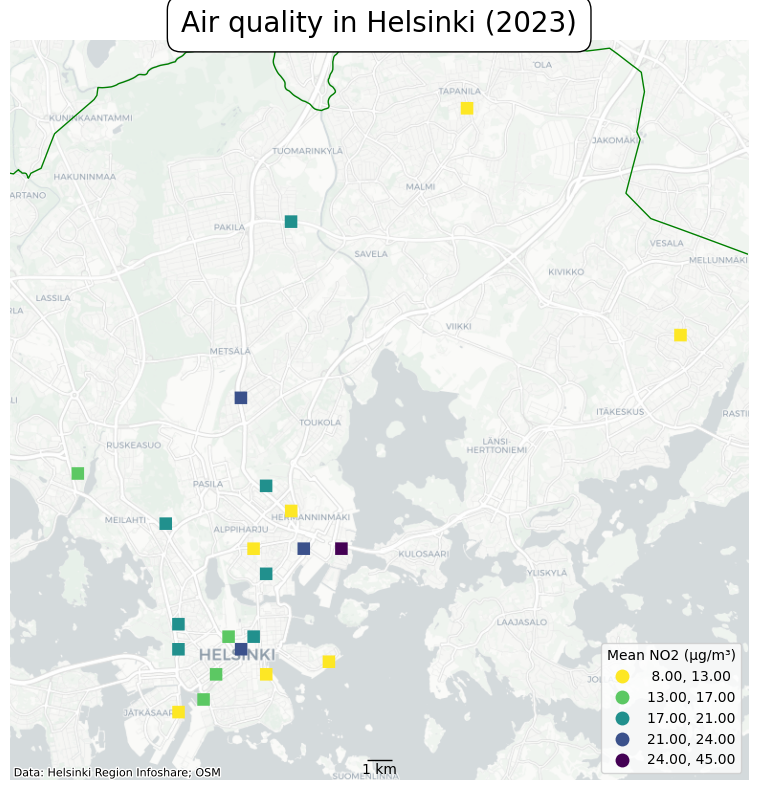

In [11]:
#3 GRID MAP 2023
## TAMA TOIMII
## MUUTA TIEDOT (otsikot jne, source)
#muista tsekate mean valuet
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import contextily
import osmnx as ox
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from mapclassify import UserDefined

# Load air quality data into a GeoDataFrame
shapefile_dir = 'ilmanlaatu_shape/'
filename = 'typpidioksidin_vuosikeskiarvot_2023.shp'
filepath = os.path.join(shapefile_dir, filename)
air_quality_gdf = gpd.read_file(filepath)

# Filter data for the year 2023
air_quality_gdf = air_quality_gdf[air_quality_gdf['Vuosi'] == 2023]

# Print the first row of the dataset to see a sample of the data
print(air_quality_gdf.head(1))

# Print the column names
print("Columns in the dataset:", air_quality_gdf.columns)

# Print a summary of the GeoDataFrame to get more details about the data
print(air_quality_gdf.info())

# Geocode Helsinki boundaries using OSMnx
PLACE_NAME = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(PLACE_NAME)

# Check and print CRS of both datasets
print("Air quality data CRS:", air_quality_gdf.crs)
print("Helsinki area CRS:", helsinki_area.crs)

# Reproject Helsinki area to match the CRS of the air quality data
helsinki_area = helsinki_area.to_crs(air_quality_gdf.crs)

# Ensure CRS match
assert air_quality_gdf.crs == helsinki_area.crs, "CRS do not match"

# Clip air quality data to Helsinki area
air_quality_gdf = gpd.clip(air_quality_gdf, helsinki_area)

# Determine the bounds of the air quality data
minx, miny, maxx, maxy = air_quality_gdf.total_bounds

# Grid dimensions (in meters)
grid_height = 250
grid_width = 250

# Generate the x and y coordinates for the grid
x_coords = np.arange(minx, maxx + grid_width, grid_width)
y_coords = np.arange(miny, maxy + grid_height, grid_height)

# Initialize a list to hold the grid polygons
grid_polygons = []

for x in x_coords:
    for y in y_coords:
        # Define the polygon for each cell
        polygon = Polygon([(x, y), (x+grid_width, y), (x+grid_width, y+grid_height), (x, y+grid_height)])
        grid_polygons.append(polygon)

# Create a GeoDataFrame from the grid polygons
grid_gdf = gpd.GeoDataFrame({'geometry': grid_polygons}, crs=air_quality_gdf.crs)

# Perform the spatial join
joined_gdf = gpd.sjoin(grid_gdf, air_quality_gdf, how="inner", predicate="intersects")

# Aggregate NO2 values by grid cell
mean_no2_df = joined_gdf.groupby(joined_gdf.index)['NO2'].mean()

# Join the aggregated NO2 values back to the grid GeoDataFrame
grid_with_no2 = grid_gdf.join(mean_no2_df, how='inner')

# Reproject grid_with_no2 to EPSG:3857 for basemap compatibility
grid_with_no2 = grid_with_no2.to_crs(epsg=3857)

# Reproject helsinki_area to EPSG:3857 for basemap compatibility
helsinki_area = helsinki_area.to_crs(epsg=3857)

#Visualize
ax = grid_with_no2.plot(
    figsize=(12, 8),
    column="NO2",
    scheme="NaturalBreaks",
    cmap="viridis_r",
    linewidth=1,
    alpha=1.0,

    legend=True,
    legend_kwds={"title": "Mean NO2 (µg/m³)", "loc": "lower right"}
)


# Remove axis
ax.set_axis_off()
plt.title('Air quality in Helsinki (2023)', 
    fontdict={'fontsize': '20', 'fontweight': '7'},
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
         )

# basemap
contextily.add_basemap(
    ax,
    source=contextily.providers.CartoDB.Positron, alpha=1.0,  # Increased alpha value for basemap visibility
    attribution=("Data: Helsinki Region Infoshare; OSM")
)

# Add a scale bar with AnchoredSizeBar
fontprops = fm.FontProperties(size=10)
scalebar = AnchoredSizeBar(ax.transData,
                           1000,  # Length of the bar in data units
                           '1 km',  # Label for the scale bar
                           'lower center',  # Location of the scale bar
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

# Add Helsinki boundaries with green edges
helsinki_area.boundary.plot(ax=ax, edgecolor="green", linewidth=1)

# Calculate the extent and center of the grid_with_no2 data
minx, miny, maxx, maxy = grid_with_no2.total_bounds
x_center = (minx + maxx) / 2
y_center = (miny + maxy) / 2
x_extent = maxx - minx
y_extent = maxy - miny
margin = 0.1  # Adjust this value to add margin around the map

# Set the axis limits to ensure the map is centered and zoom out a bit
zoom_out_factor = 1.2  # Adjust this factor to zoom out more or less
ax.set_xlim(x_center - (x_extent / 2) * zoom_out_factor, x_center + (x_extent / 2) * zoom_out_factor)
ax.set_ylim(y_center - (y_extent / 2) * zoom_out_factor, y_center + (y_extent / 2) * zoom_out_factor)

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('gridmap_no2_2023.png', bbox_inches='tight')

# Show plot
plt.show()


In [15]:
# mean values of NO2 for years 2015-2023 in Helsinki

import geopandas as gpd
import pandas as pd
import osmnx as ox

# Geocode Helsinki boundaries using OSMnx
PLACE_NAME = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(PLACE_NAME)

# Initialize a dictionary to store mean NO2 values for each year
mean_no2_values = {}

# Loop through each year
for year in range(2015, 2024):
    # Load the shapefile for the current year
    filepath = f"ilmanlaatu_shape/typpidioksidin_vuosikeskiarvot_{year}.shp"
    air_quality_gdf = gpd.read_file(filepath)
    
    # Ensure the air quality data and Helsinki boundary are in the same CRS
    air_quality_gdf = air_quality_gdf.to_crs(helsinki_area.crs)
    
    # Spatially join to keep only points within Helsinki boundary
    air_quality_helsinki = gpd.overlay(air_quality_gdf, helsinki_area, how='intersection')
    
    # Extract year and NO2 columns
    extracted_data = air_quality_helsinki[['Vuosi', 'NO2']]
    
    # Convert NO2 column to numeric, coercing errors to NaN
    extracted_data['NO2'] = pd.to_numeric(extracted_data['NO2'], errors='coerce')
    
    # Calculate the mean NO2 value for the current year, excluding NaN values
    mean_no2 = extracted_data['NO2'].mean()
    
    # Store the mean NO2 value in the dictionary
    mean_no2_values[year] = mean_no2

# Convert the dictionary to a pandas Series
mean_no2_series = pd.Series(mean_no2_values)

print(mean_no2_series)


C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['NO2'] = pd.to_numeric(extracted_data['NO2'], errors='coerce')
C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['NO2'] = pd.to_numeric(extracted_data['NO2'], errors='coerce')
C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy 

2015    33.222222
2016    32.564103
2017    29.600000
2018    25.486486
2019    22.709677
2020    15.812500
2021    19.750000
2022    20.304348
2023    18.130435
dtype: float64


C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['NO2'] = pd.to_numeric(extracted_data['NO2'], errors='coerce')
C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['NO2'] = pd.to_numeric(extracted_data['NO2'], errors='coerce')
C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\2166585796.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy 

C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\3403744061.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


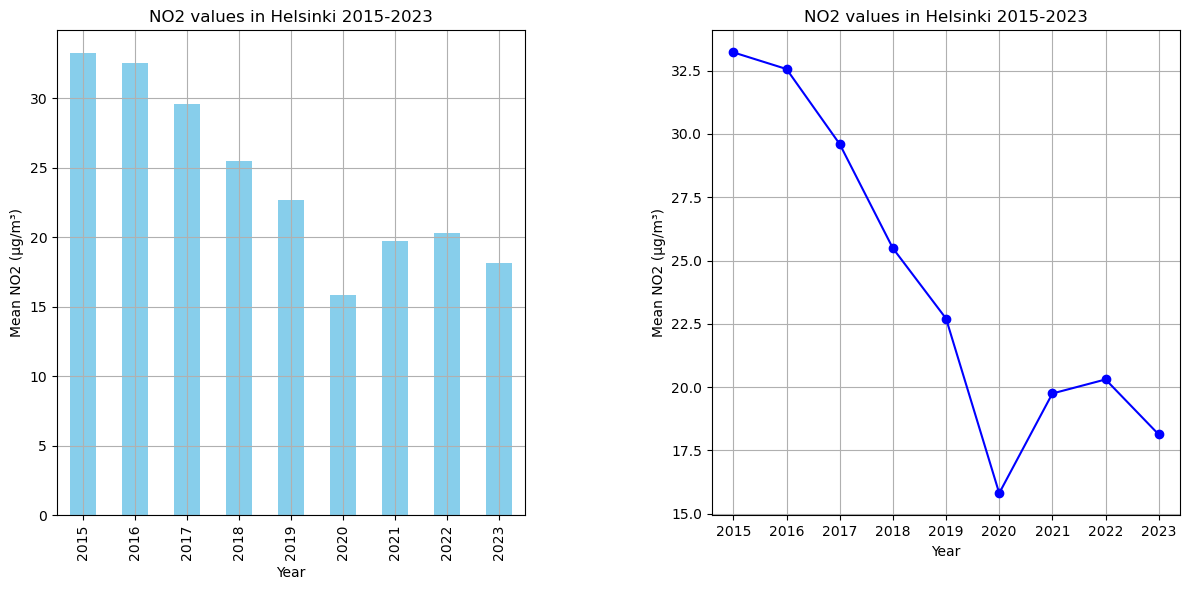

In [21]:
# Plotting bar and line chart
plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
mean_no2_series.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean NO2 (µg/m³)')
plt.title('NO2 values in Helsinki 2015-2023')
plt.grid(True)

# Line chart
plt.subplot(1, 2, 2)
mean_no2_series.plot(kind='line', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Mean NO2 (µg/m³)')
plt.title('NO2 values in Helsinki 2015-2023')
plt.grid(True)

plt.tight_layout()

# Adjust layout to make space between plots
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # Adjust horizontal spacing between subplots
# Save the plot as a PNG file
plt.savefig('meanvalues_bar_linechart.png', bbox_inches='tight')

plt.show()


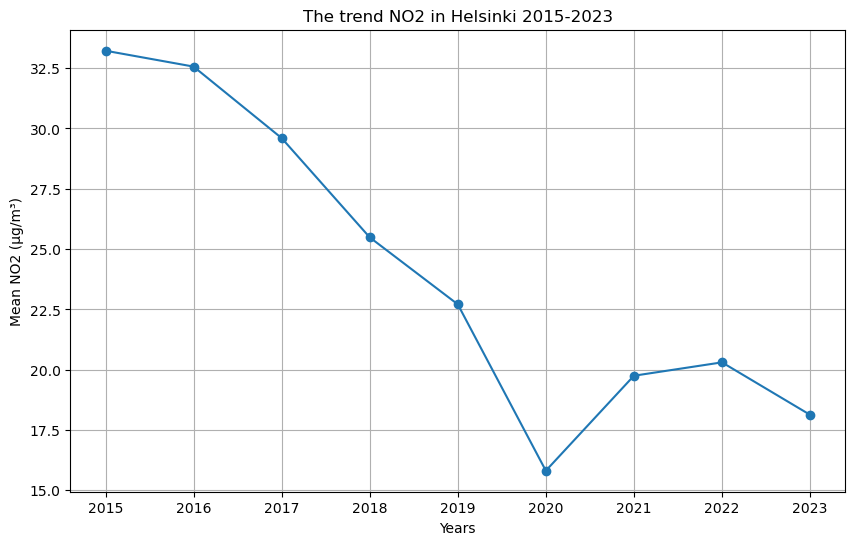

In [24]:
# trend analysis
# muista helsinki rajat
import matplotlib.pyplot as plt

# Calculate the average NO2 levels for each year
avg_no2_per_year = mean_no2_values

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(mean_no2_series, marker='o', linestyle='-')
plt.title('The trend NO2 in Helsinki 2015-2023')
plt.xlabel('Years')
plt.ylabel('Mean NO2 (µg/m³)')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('trendvalues_2015_2023.png', bbox_inches='tight')

plt.show()


In [26]:
# saving the shape file
import osmnx as ox

# Geocode Helsinki boundaries using OSMnx
place_name = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(place_name)

# Save the boundaries to a shapefile
output_shapefile = "helsinki_boundary.shp"
helsinki_area.to_file(output_shapefile)

# Confirm the file path where the shapefile is saved
print(f"Shapefile saved to: {os.path.abspath(output_shapefile)}")


Shapefile saved to: C:\Users\lauri\Downloads\final_portfolio\helsinki_boundary.shp


C:\Users\lauri\AppData\Local\Temp\ipykernel_7464\1350535557.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  helsinki_area.to_file(output_shapefile)


In [28]:
#sidebydide map

import geopandas as gpd
import folium
import osmnx as ox
from IPython.display import IFrame, display_html
import pandas as pd

# Geocode Helsinki boundaries using OSMnx
PLACE_NAME = "Helsinki, Finland"
helsinki_area = ox.geocode_to_gdf(PLACE_NAME)

# Function to load and process data for a specific year
def load_and_process_data(year):
    filepath = f"ilmanlaatu_shape/typpidioksidin_vuosikeskiarvot_{year}.shp"
    air_quality_gdf = gpd.read_file(filepath)
    
    # Ensure the air quality data and Helsinki boundary are in the same CRS
    air_quality_gdf = air_quality_gdf.to_crs(helsinki_area.crs)
    
    # Spatially join to keep only points within Helsinki boundary
    air_quality_helsinki = gpd.overlay(air_quality_gdf, helsinki_area, how='intersection')
    
    # Transform CRS to EPSG:4326 for Folium
    air_quality_helsinki = air_quality_helsinki.to_crs(epsg=4326)
    
    return air_quality_helsinki

# Function to create a Folium map for a given year
def create_map(data, year):
    m = folium.Map(location=[60.1699, 24.9384], zoom_start=11)
    
    for idx, row in data.iterrows():
        if pd.notnull(row['NO2']):
            folium.Marker(
                location=[row.geometry.y, row.geometry.x],
                popup=f"Year: {year}<br>NO2: {row['NO2']}",
                icon=folium.Icon(color='blue' if row['NO2'] < 20 else 'red')
            ).add_to(m)
    
    return m

# Create maps for the specified years
years = [2015, 2020, 2023]

maps = []
for year in years:
    data = load_and_process_data(year)
    map_ = create_map(data, year)
    maps.append(map_)

# Save the maps to HTML files
maps[0].save('map_2015.html')
maps[1].save('map_2020.html')
maps[2].save('map_2023.html')

# Function to display side-by-side maps using IFrame
def display_side_by_side_maps(map1_html, map2_html):
    display_html(
        f"""
        <div style="display: flex;">
            <iframe src="{map1_html}" width="50%" height="500"></iframe>
            <iframe src="{map2_html}" width="50%" height="500"></iframe>
        </div>
        """,
        raw=True
    )

# Display side-by-side maps for 2015 and 2020
display_side_by_side_maps('map_2015.html', 'map_2020.html')

# Display side-by-side maps for 2020 and 2023
display_side_by_side_maps('map_2020.html', 'map_2023.html')





In [57]:
# Storytelling map

import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load Helsinki boundary data
helsinki_boundary = gpd.read_file("helsinki_boundary.shp")

# Define the range of years
years = range(2015, 2023)

# Initialize a list to store all data
all_data = []
mean_no2_values = {}

# Loop through each year
for year in years:
    filepath = f"ilmanlaatu_shape/typpidioksidin_vuosikeskiarvot_{year}.shp"
    air_quality_gdf = gpd.read_file(filepath)
    air_quality_gdf = air_quality_gdf.to_crs(helsinki_boundary.crs)
    air_quality_helsinki = gpd.overlay(air_quality_gdf, helsinki_boundary, how='intersection')
    air_quality_helsinki = air_quality_helsinki.to_crs(epsg=4326)
    air_quality_helsinki['NO2'] = pd.to_numeric(air_quality_helsinki['NO2'], errors='coerce')
    air_quality_helsinki['Year'] = year

    # Calculate mean NO2 for the year
    mean_no2 = air_quality_helsinki['NO2'].mean()
    mean_no2_values[year] = mean_no2

    all_data.append(air_quality_helsinki)

# Concatenate all data into a single GeoDataFrame
all_data_gdf = pd.concat(all_data, ignore_index=True)

# Create a Folium map centered on Helsinki
m = folium.Map(location=[60.1699, 24.9384], zoom_start=11.4)


# Add markers for health and environmental impact
for idx, row in all_data_gdf.iterrows():
    if pd.notnull(row['NO2']):
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=f"Year: {row['Year']}<br>NO2: {row['NO2']}",
            icon=folium.Icon(color='blue' if row['NO2'] < 20 else 'red')
        ).add_to(m)

# Save the map to an HTML file
m.save('all_markers_blue_red.html')

# Display the map (this will work in Jupyter Notebook)
m




In [59]:
# Slider to show no2-values year-by-year with blue and red markers.
#######
import geopandas as gpd
import folium
from folium.plugins import TimestampedGeoJson

# Load Helsinki boundary data
helsinki_boundary = gpd.read_file("helsinki_boundary.shp")

# Initialize a list to store features for TimestampedGeoJson
features = []

# Define the range of years
years = range(2015, 2024)

# Loop through each year
for year in years:
    # Load the shapefile for the current year
    filepath = f"ilmanlaatu_shape/typpidioksidin_vuosikeskiarvot_{year}.shp"
    air_quality_gdf = gpd.read_file(filepath)
    
    # Ensure the air quality data and Helsinki boundary are in the same CRS
    air_quality_gdf = air_quality_gdf.to_crs(helsinki_boundary.crs)
    
    # Spatially join to keep only points within Helsinki boundary
    air_quality_helsinki = gpd.overlay(air_quality_gdf, helsinki_boundary, how='intersection')
    
    # Iterate over each geometry in the GeoDataFrame
    for idx, row in air_quality_helsinki.iterrows():
        # Convert geometry to GeoJSON format
        geometry = row.geometry.__geo_interface__
        
        # Extract mean NO2 value for the current year
        mean_no2 = float(row['NO2']) if row['NO2'] is not None else None

        # Determine marker color based on NO2 value
        marker_color = 'blue' if mean_no2 is not None and mean_no2 < 20 else 'red'
        
        # Create a feature and append it to the features list
        feature = {
            'type': 'Feature',
            'geometry': geometry,
            'properties': {
                'time': f"{year}-01-01T00:00:00Z",  # Using full timestamp format
                'style': {'color': marker_color},
                'icon': 'circle',
                'popup': f"Year: {year}<br>NO2: {mean_no2}"
            }
        }
        features.append(feature)

# Create a Folium map centered on Helsinki
m = folium.Map(location=[60.1699, 24.9384], zoom_start=11.4)

# Add TimestampedGeoJson layer to the map
TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1Y',
    duration='P1Y',
    auto_play=False,
    loop=False,
    max_speed=1,
    loop_button=True,
    date_options='YYYY',
    time_slider_drag_update=True,
    transition_time=200,
    add_last_point=True,
).add_to(m)

# Save the map to an HTML file
m.save('slider_and_markers.html')




In [ ]:
# This push changes to Github page

!git add .
!git commit -m "Description of your changes"
!git push origin main


In [ ]:
!git push origin main


In [ ]:
#Bar diagram and line chart 
